In [1]:
import argparse
import logging
import os
import numpy as np
from numpy import fft
import torch
import torch.nn.functional as F
from torchvision import transforms
from patchify import patchify, unpatchify
from math import log10, sqrt, cos, sin, pi
from utils.data_loading import BasicDataset
from unet import UNet
from math import cos, sin, pi
import matplotlib.pyplot as plt

In [29]:
edge = np.load('./npy/low_new_edge.npy')

In [30]:
def sig(img):
    new_arr = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j]>=0.0:
                new_arr[i,j] = 0
            else:
                new_arr[i,j] = 255
    return new_arr

In [2]:
def polar2complex(arr):
    new_arr = arr[:,:,0]*np.cos((arr[:,:,1]/255*360-180)/180*pi)+1j*arr[:,:,0]*np.sin((arr[:,:,1]/255*360-180)/180*pi)
    return new_arr

In [3]:
def cart2complex(arr):
    new_arr = arr[:,:,0]+1j*arr[:,:,1]
    return new_arr

In [4]:
def polar2cart(arr):
    new_arr = np.array([arr[:,:,0]*np.cos((arr[:,:,1]/255*360-180)/180*pi),arr[:,:,0]*np.sin((arr[:,:,1]/255*360-180)/180*pi)])
    new_arr = new_arr.transpose((1,2,0))
    return new_arr

In [15]:
def cart2polar(arr):
    new_arr = np.zeros(arr.shape)
    new_arr[:,:,0] = np.abs(arr[:,:,0]+1j*arr[:,:,1])
    new_arr[:,:,1] = np.angle(arr[:,:,0]+1j*arr[:,:,1])*127.5/pi+sig(np.angle(arr[:,:,0]+1j*arr[:,:,1]))
    return new_arr

In [33]:
# 全图测试 模长+辐角
i = 685
low_address = './image_polar/low/%04d.npy'%i
high_address = './image_polar/high/%04d.npy'%i
pred_address = './image_polar/pred/%04d.npy'%i

# # 全图测试 图像only
# i = 685
# low_address = './image/low resolution/%04d.npy'%i
# high_address = './image/high resolution/%04d.npy'%i
# pred_address = './image/pred/%04d.npy'%i

# # 全图测试 虚部+实部
# i = 685
# low_address = './image_cart/low/%04d.npy'%i
# high_address = './image_cart/high/%04d.npy'%i
# pred_address = './image_cart/pred/%04d.npy'%i

# 全图测试 图像only
# i = 708
# low_address = './data_img/low/%04d.npy'%i
# high_address = './data_img/high/%04d.npy'%i
# pred_address = './data_img/pred/%04d.npy'%i

In [17]:
# # 双通道测试程序
# img_cart = np.load(low_address)
# img_cart = img_cart.transpose((2,0,1))
# img_cart = img_cart[np.newaxis,...] / 255

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# net = UNet(n_channels=2, n_classes=2, bilinear=False)
# net.load_state_dict(torch.load(Model_address, map_location=device),strict=True)

# img_tensor = torch.as_tensor(img_cart.copy()).float().contiguous()
# print('Image loaded...')
# print('Predicting the result...')

# with torch.no_grad():
#     masks_pred = net(img_tensor)
#     pred_cart = masks_pred.detach().numpy()[0, :, :, :]
#     pred = pred_cart.transpose((1,2,0))
#     print(pred.shape)
#     np.save(pred_address, pred)
# print('Image is predicted ✧≖ ◡ ≖✿')

In [70]:
edge = np.load('./npy/low_new_edge.npy')

In [79]:
i= 850
sample = edge[i,:]
samp = cart2polar(sample)
print(np.min(samp[:,:,0]))

7.944109290391274e-15


Abs loaded...
Predicting the result...
Image is predicted ✧≖ ◡ ≖✿


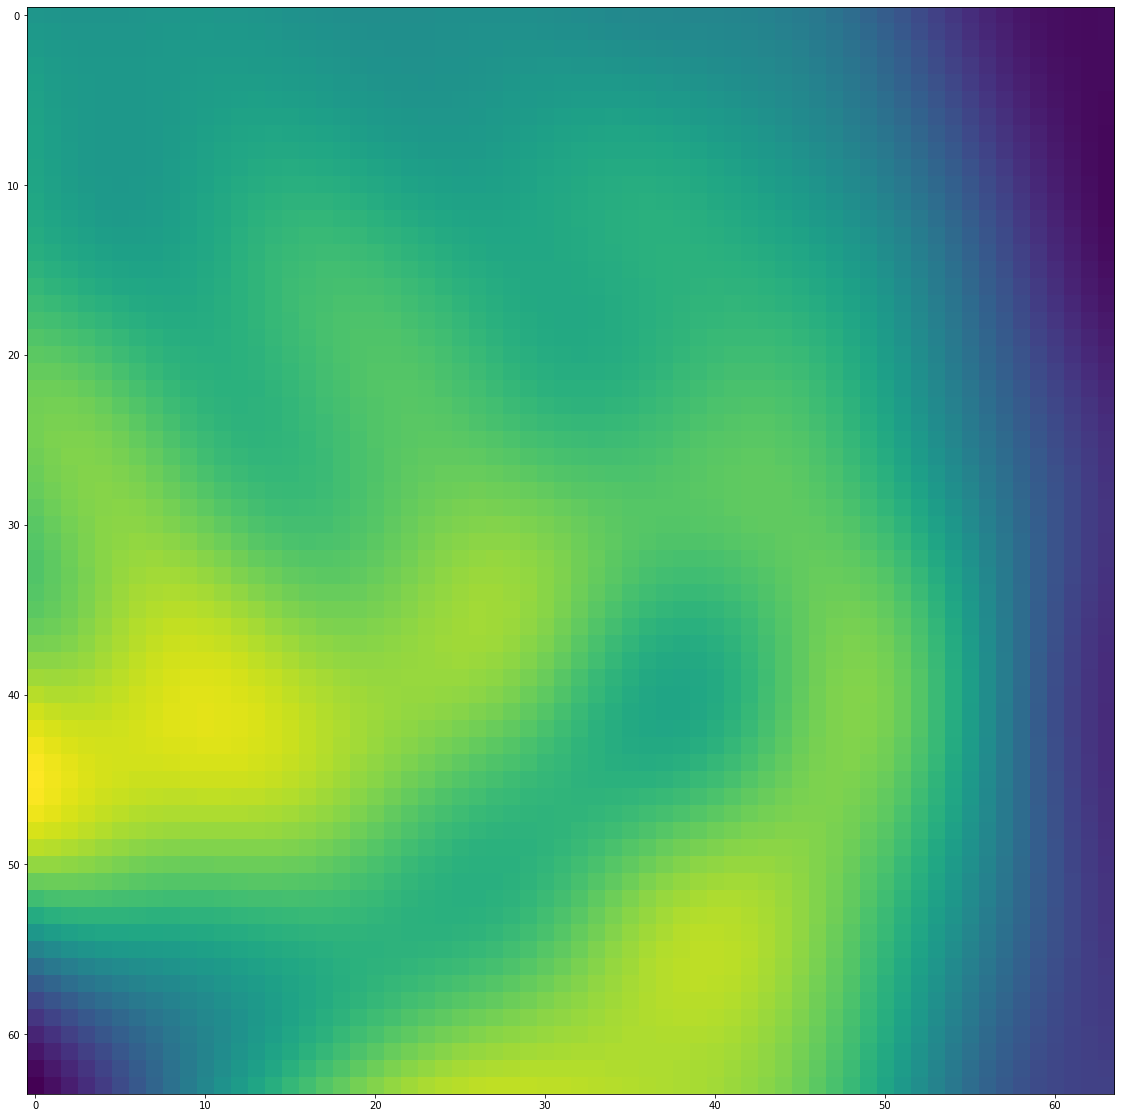

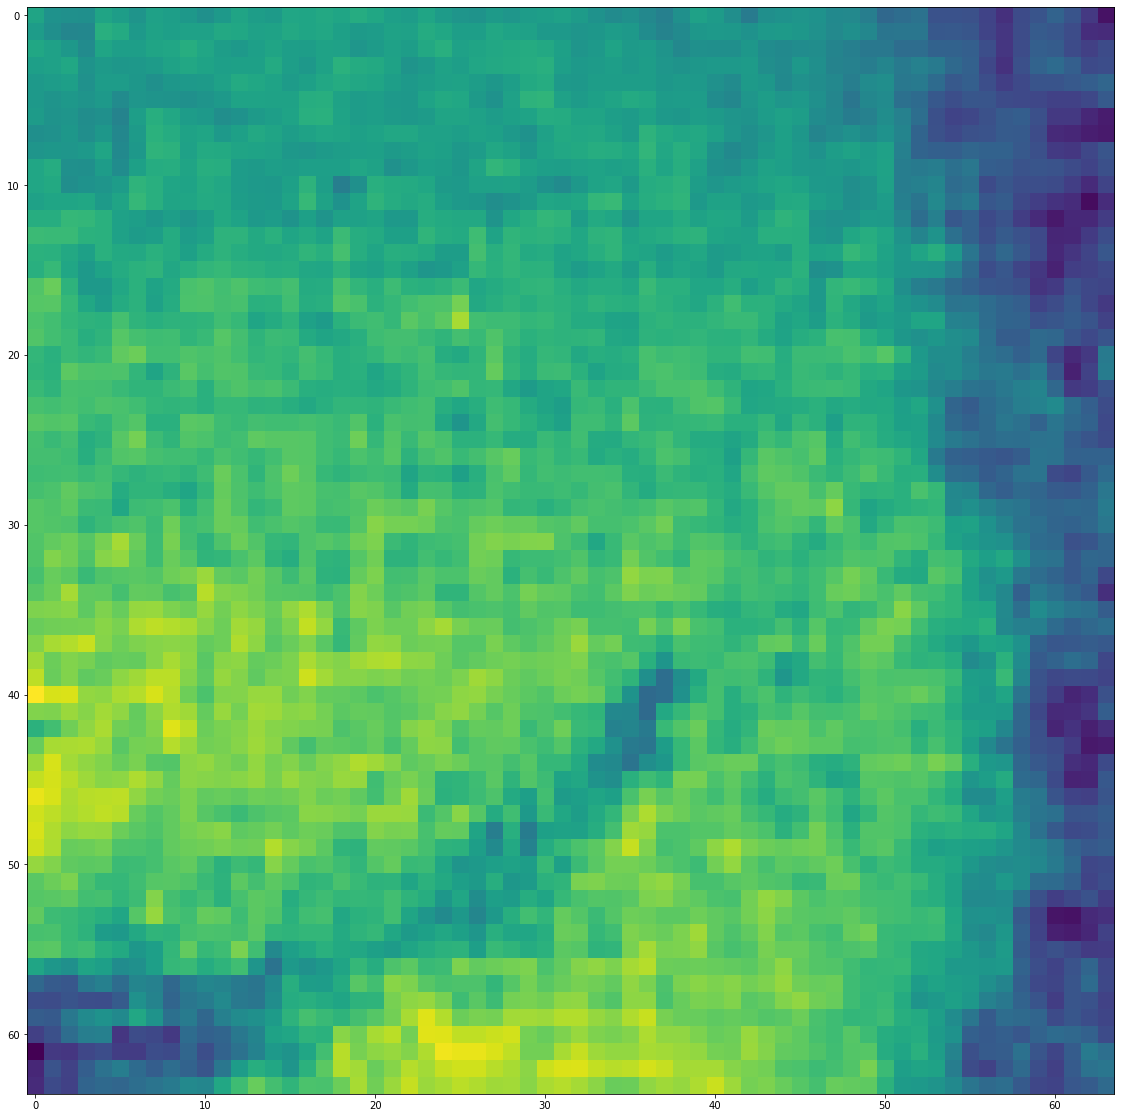

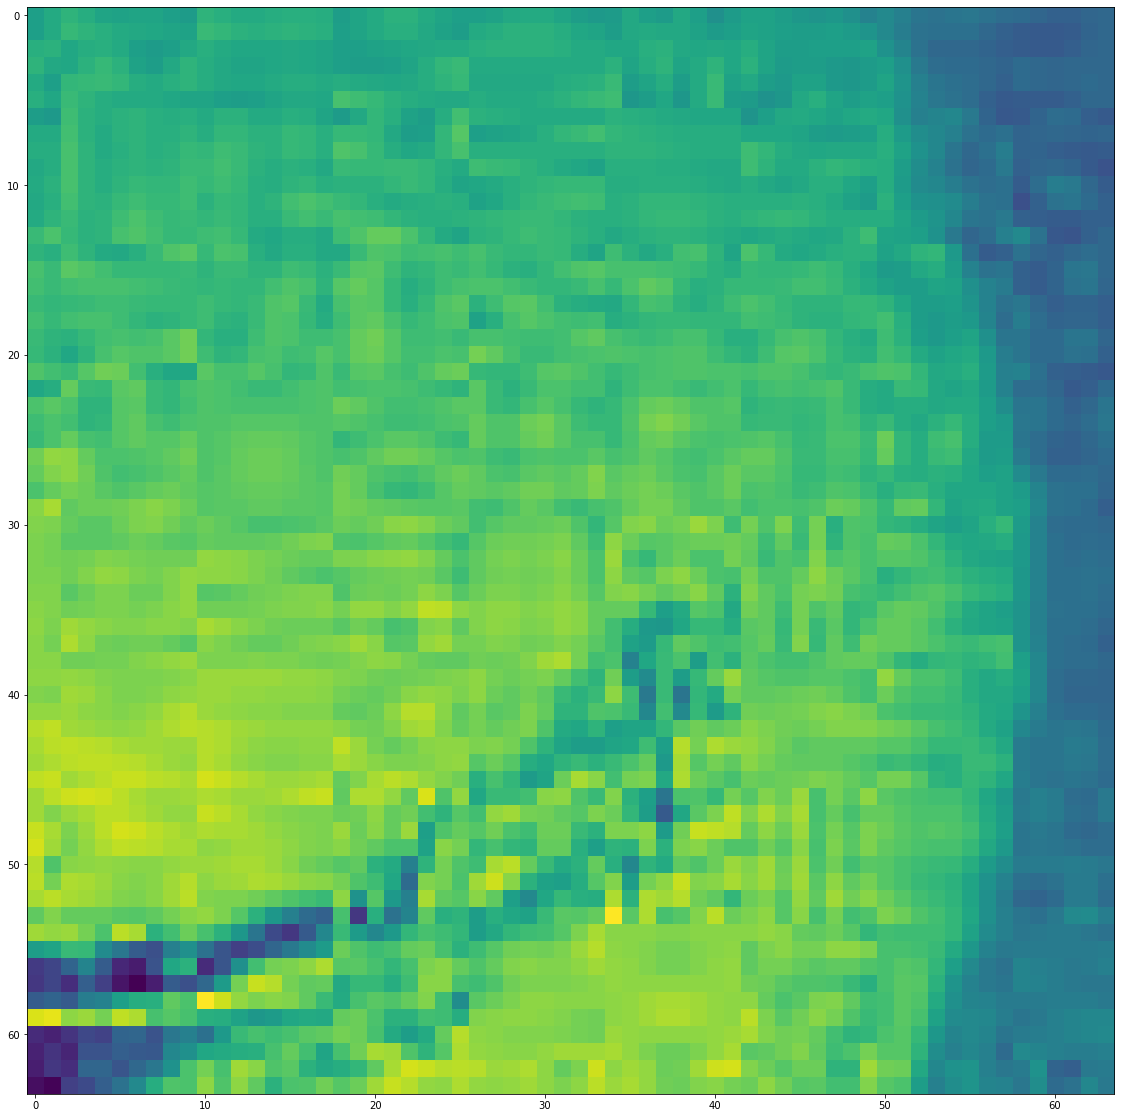

In [31]:
# 模长测试程序
mul_channel = np.load(low_address)
# k =400
# mul_channel = np.load('./edge_new.npy')
plt.figure(figsize=(20,20))
plt.imshow(mul_channel)
# mul_channel = samp
Abs = mul_channel[np.newaxis,np.newaxis,...]/255
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = UNet(n_channels=1, n_classes=1, bilinear=False)
net.load_state_dict(torch.load('./MODEL_img.pth', map_location=device),strict=True)

Abs_tensor = torch.as_tensor(Abs.copy()).float().contiguous()
print('Abs loaded...')

with torch.no_grad():
    print('Predicting the result...')
    masks_pred = net(Abs_tensor)
    pred_abs = masks_pred.detach().numpy()[0, 0, :, :]
plt.figure(figsize=(20,20))
plt.imshow(pred_abs)
# np.save('./img_pred.npy', pred_abs)
print('Image is predicted ✧≖ ◡ ≖✿')

mul_channel = np.load(high_address)
# k =400
# mul_channel = np.load('./edge_new.npy')
plt.figure(figsize=(20,20))
plt.imshow(mul_channel)

In [11]:
plt.imsave('haha.jpg',pred_abs)

In [26]:
# pred_abs = pred_abs/np.max(pred_abs)*255
# plt.figure(figsize=(20,20))
# plt.imshow(pred_abs,'gray')
# print(np.max(pred_abs))
# plt.imsave('./dry.jpg',pred_abs)

Angle loaded...
Predicting the result...
Image is predicted ✧≖ ◡ ≖✿


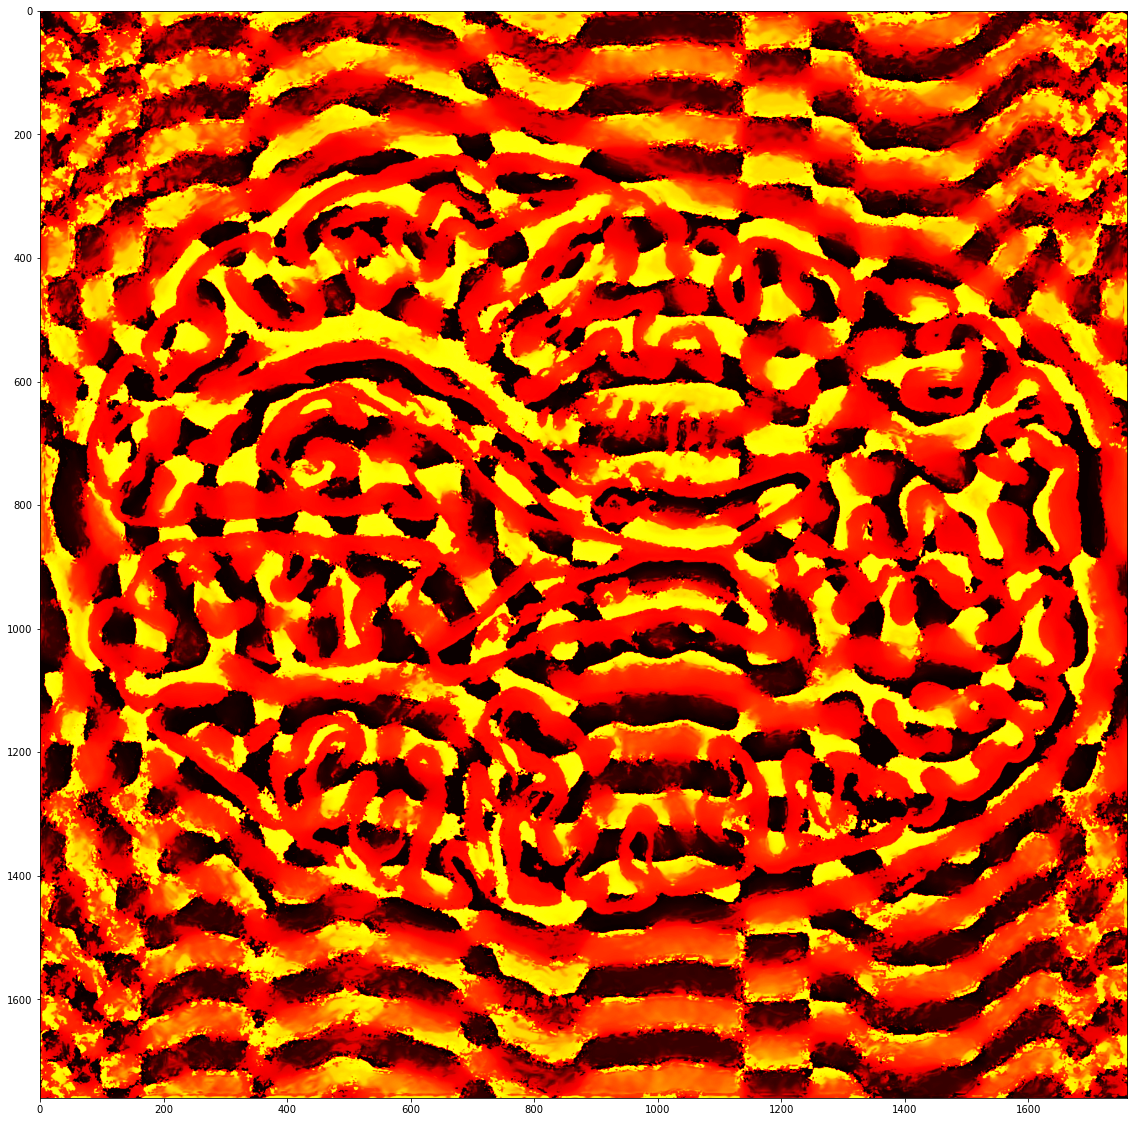

In [34]:
# 辐角测试程序
mul_channel = np.load(low_address)
# mul_channel = samp
Angle = mul_channel[:,:,1][np.newaxis,np.newaxis,...]/255
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = UNet(n_channels=1, n_classes=1, bilinear=False)
net.load_state_dict(torch.load('./MODEL_angle.pth', map_location=device),strict=True)
Angle_tensor = torch.as_tensor(Angle.copy()).float().contiguous()
print('Angle loaded...')
with torch.no_grad():
    print('Predicting the result...')
    masks_pred = net(Angle_tensor)
    pred_angle = masks_pred.detach().numpy()[0, 0, :, :]
plt.figure(figsize=(20,20))
plt.imshow(pred_angle,'hot')
np.save('./ang_pred.npy', pred_angle)
print('Image is predicted ✧≖ ◡ ≖✿')

Original img maximum: 254
Predicted edge abs maximum: 176.1043243408203
Predicted edge angle maximum: 499.4043112362132
Predicted whole image maximum: 277.9753959125292


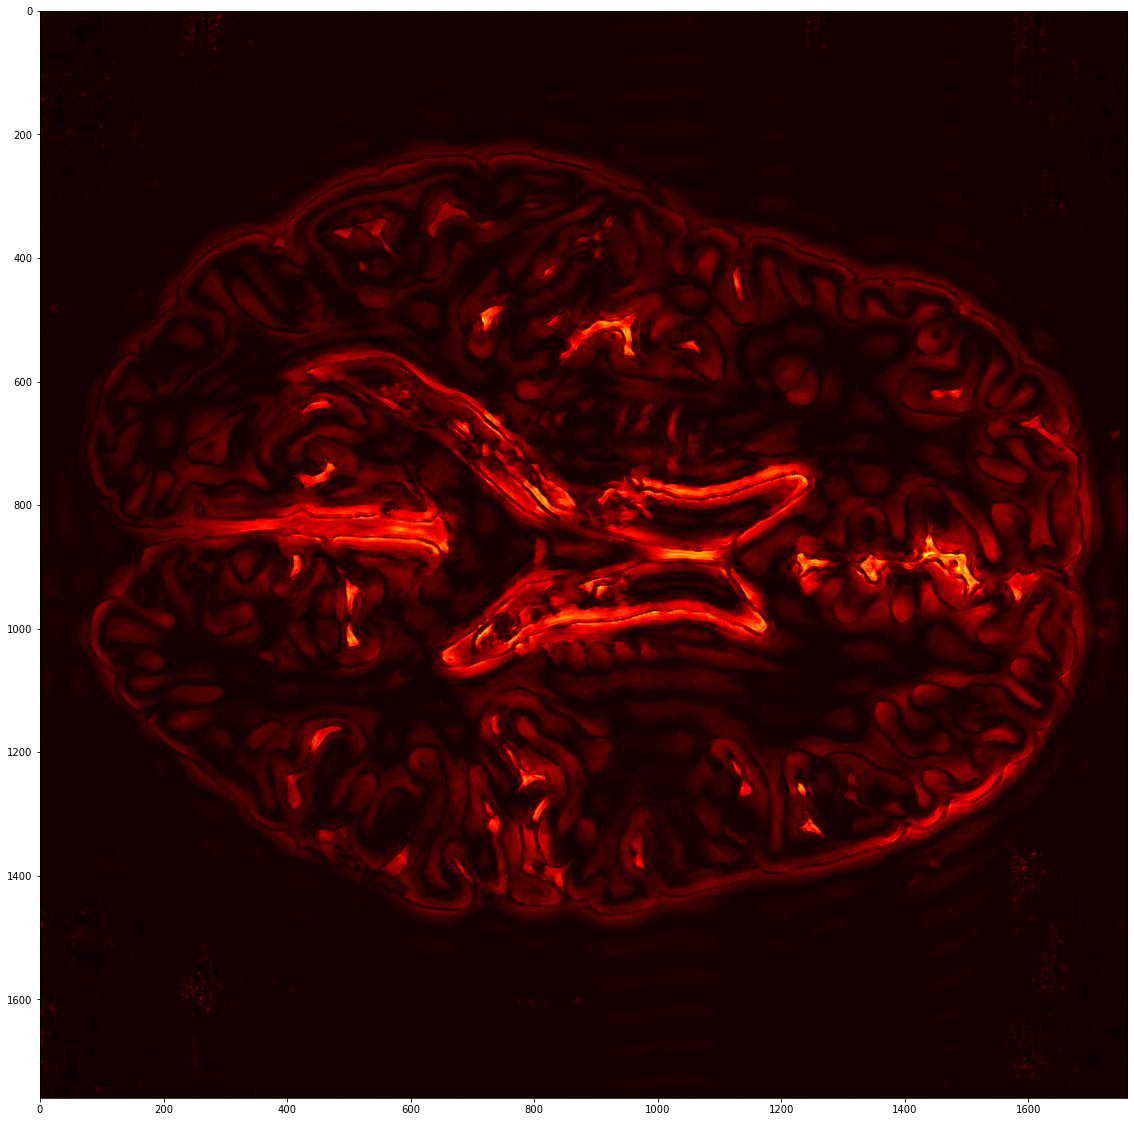

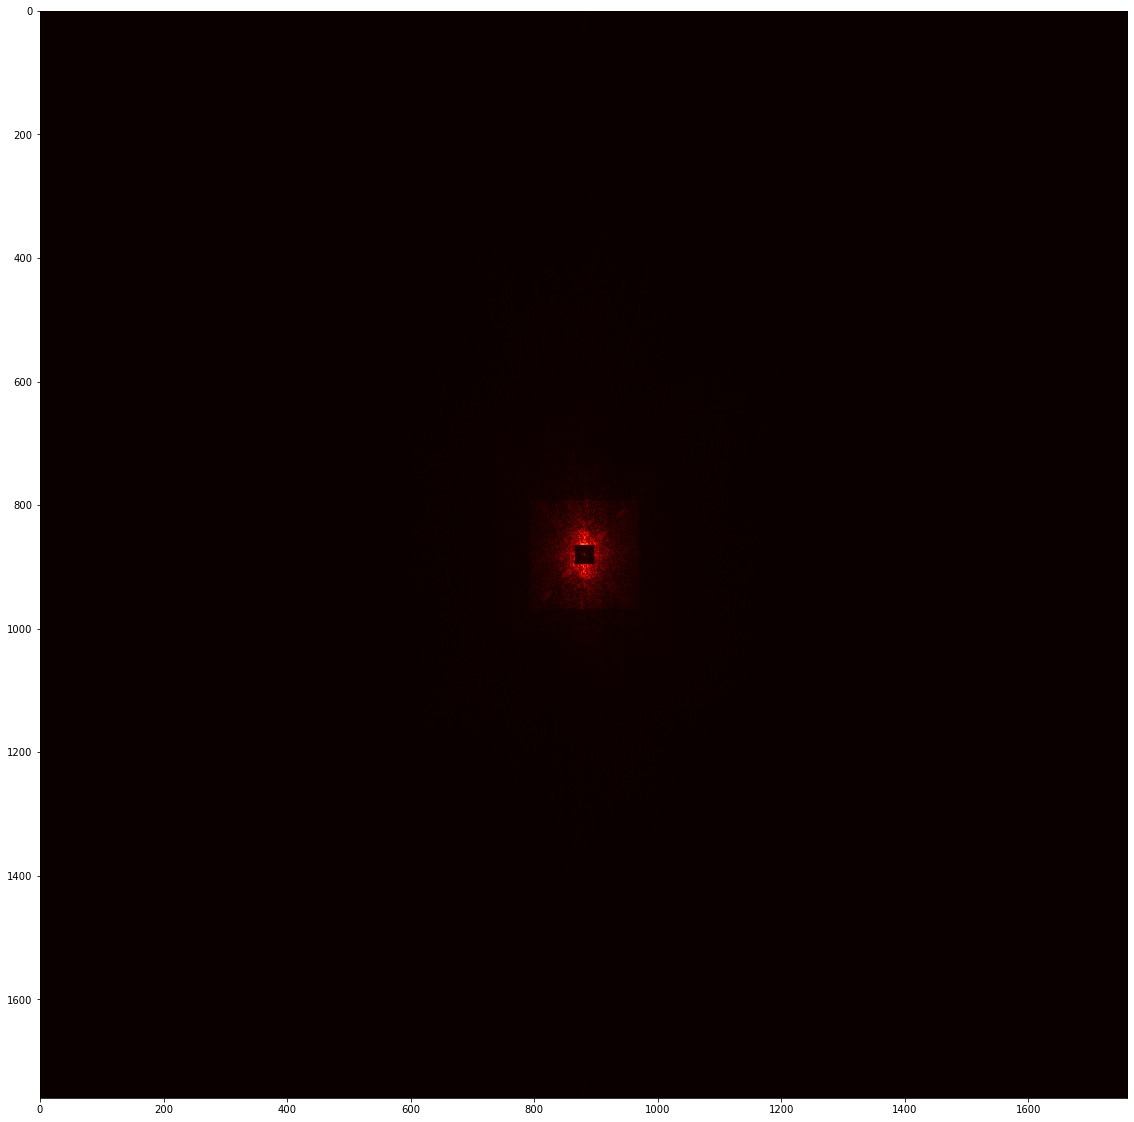

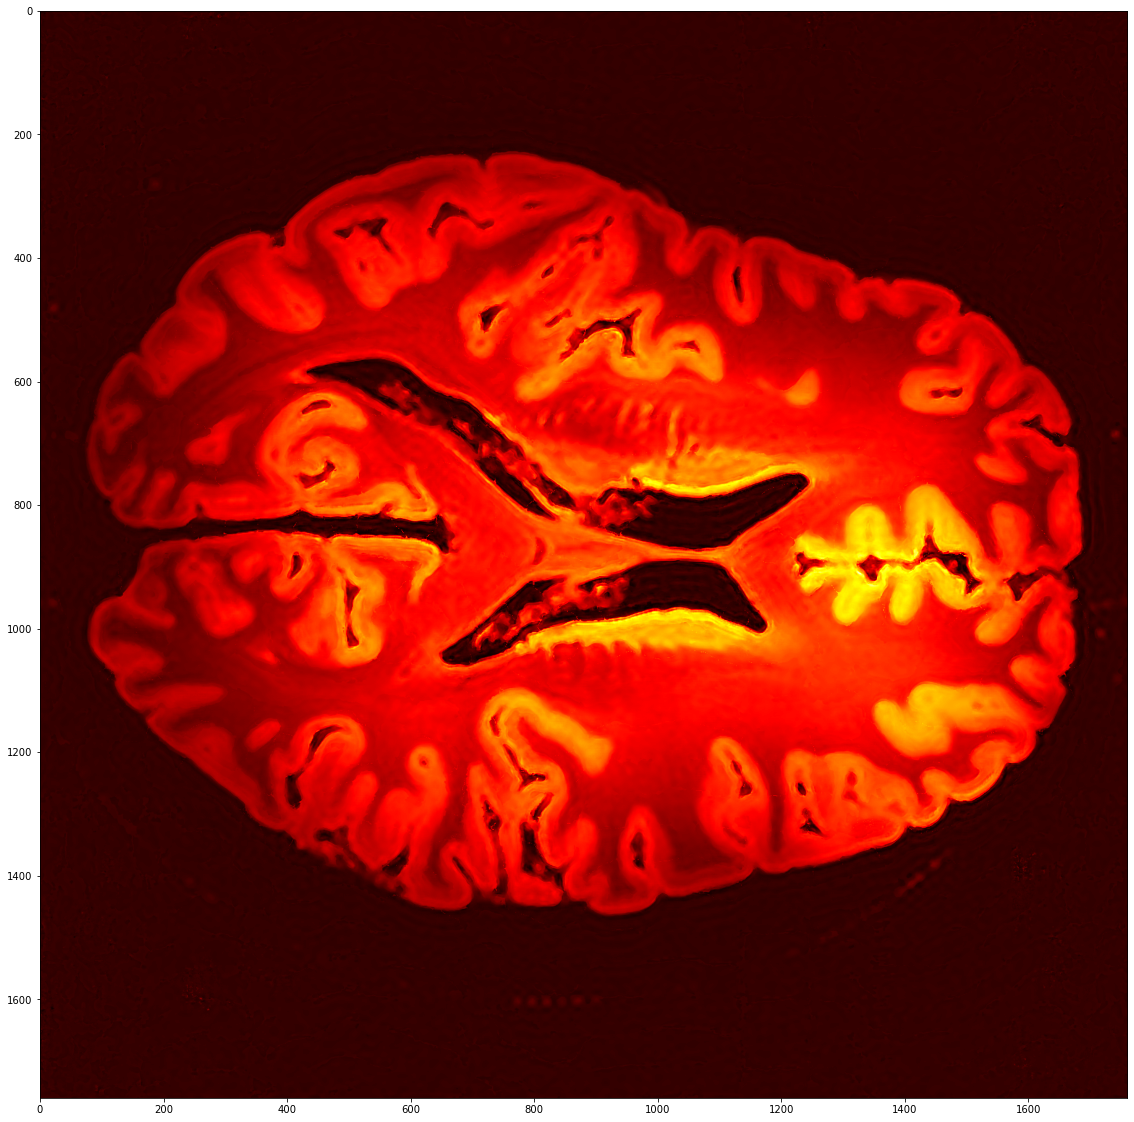

In [62]:
i = 176
center = np.load('./data_center/square176/0685.npy')
high = np.load('./high-resolution-np/0685.npy')
print("Original img maximum:",np.max(high))
fft_high = fft.fftshift(fft.fft2(high))
center_high = fft_high[881-i//2:881+i//2,881-i//2:881+i//2]

high_edge = np.load('./image_multiple/abs/high/0685.npy')

pred_img = np.load(pred_address)
pred_img = pred
plt.figure(figsize=(20,20))
plt.imshow(pred_img[:,:,0], 'hot')
print("Predicted edge abs maximum:",np.max(pred_img[:,:,0]))
print("Predicted edge angle maximum:",np.max(pred_img[:,:,1]/255*360))
pre_c = polar2complex(pred_img)
pred_fft = fft.fftshift(fft.fft2(pre_c))

plt.figure(figsize=(20,20))
plt.imshow(abs(pred_fft), 'hot')
i = 176
pred_fft[881-i//2:881+i//2,881-i//2:881+i//2] = center_high
img_pred = abs(fft.ifft2(fft.fftshift(pred_fft)))
plt.figure(figsize=(20,20))
plt.imshow(img_pred, 'hot')
print("Predicted whole image maximum:",np.max(img_pred))
plt.imsave('new_w.jpg',img_pred)

# i = 176
# low_res = np.zeros((1760,1760),dtype = complex)
# low_res[881-i//2:881+i//2,881-i//2:881+i//2] = center_high
# low = abs(fft.ifft2(fft.fftshift(low_res)))
# plt.figure(figsize=(20,20))
# plt.imshow(low, 'gray')

In [33]:
center = np.load('./data_center/square176/0685.npy')

plt.figure(figsize=(20,20))

[[[  21302.03804896   87875.9013902 ]
  [   3657.71860633 -123558.66933444]
  [ -66355.50309396   51635.71483199]
  ...
  [  70806.54412375   61721.65102366]
  [  -9929.21306619  -67578.42325375]
  [  -6310.49019987   80961.55797288]]

 [[  32983.59177746  -91573.52006774]
  [ -40286.28757661   48074.32273825]
  [  54323.12900163  -20613.3451207 ]
  ...
  [ -43820.44308644  -97875.81008119]
  [ -15615.24687488   25680.95704666]
  [  26204.98139935  -22758.6780009 ]]

 [[ -77974.99035891  -34577.40867194]
  [  60353.2687823    31963.97492419]
  [ -41469.17171228  -13988.60431697]
  ...
  [    648.24274486   37037.67089036]
  [   1327.60260584   43874.57863877]
  [ -58058.28685914  -33781.04394271]]

 ...

 [[ -15615.24687488  -25680.95704666]
  [ -43820.44308644   97875.81008119]
  [ -26819.56370918  -56335.8835268 ]
  ...
  [ -40286.28757661  -48074.32273825]
  [  32983.59177746   91573.52006774]
  [  25253.21095151   -8170.19354266]]

 [[  -9929.21306619   67578.42325375]
  [  70806.5

Original img maximum: 254


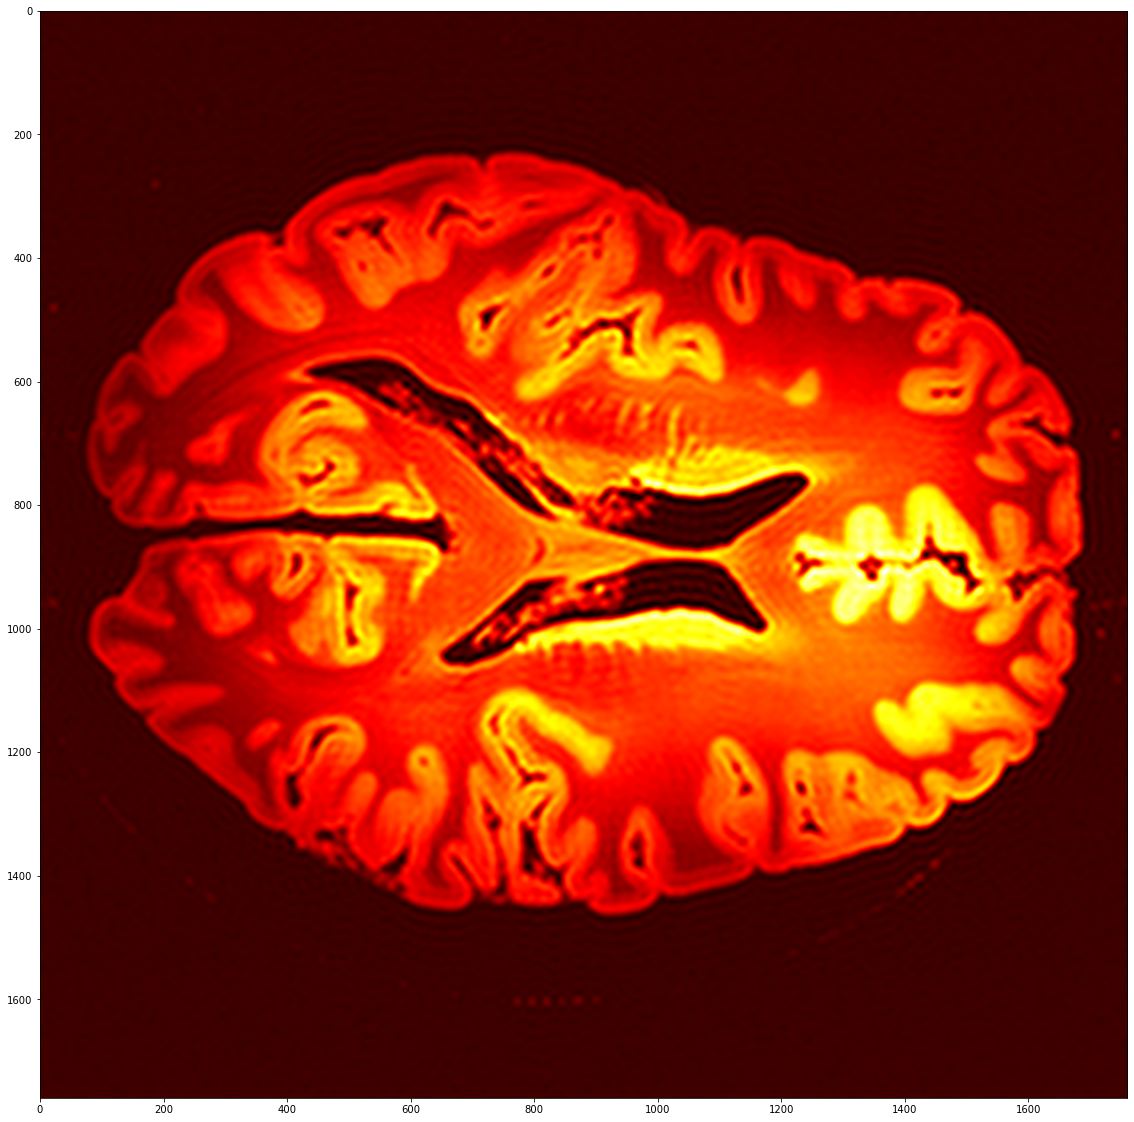

In [30]:
i = 176
high = np.load('./high-resolution-np/0685.npy')
print("Original img maximum:",np.max(high))
fft_high = fft.fftshift(fft.fft2(high))
center_high = np.zeros((1760,1760),dtype=complex)
center_high[881-i//2:881+i//2,881-i//2:881+i//2] = fft_high[881-i//2:881+i//2,881-i//2:881+i//2]
img_pred = abs(fft.ifft2(fft.fftshift(center_high)))
plt.figure(figsize=(20,20))
plt.imshow(img_pred, 'hot')
plt.imsave('low_w.jpg',img_pred)

In [35]:
i = 18
low_patch = np.load('./data_polar_div/abs/low/%04d.npy'%i)
rst_patch = np.load('./data_polar_div/abs/result/%04d.npy'%i)
high_patch = np.load('./data_polar_div/abs/high/%04d.npy'%i)
print(np.max(low_patch))
print(np.max(rst_patch))
print(np.max(high_patch))

20.262448440237794
41.362553
47.19604024398516


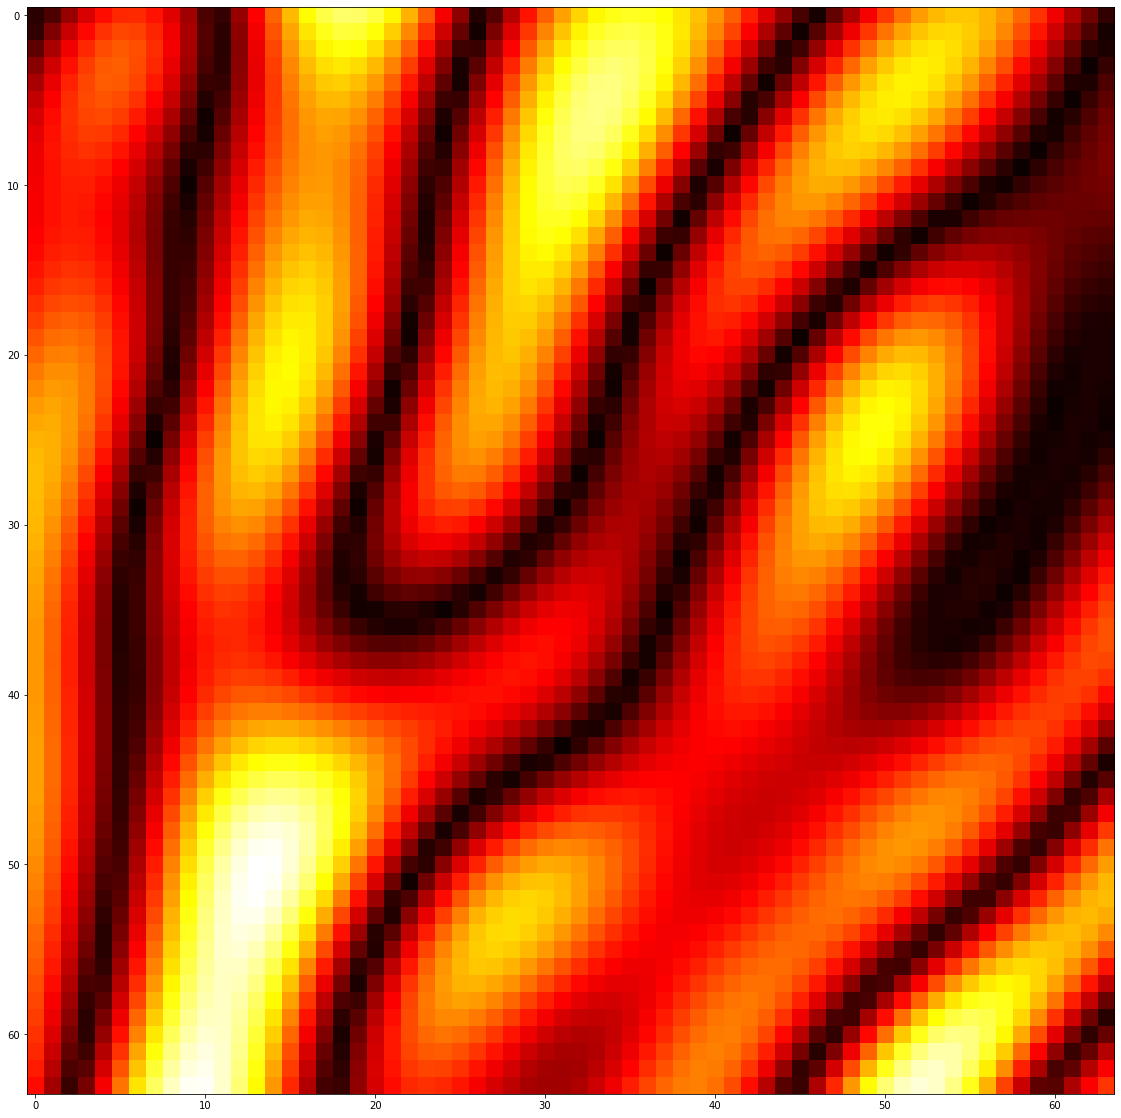

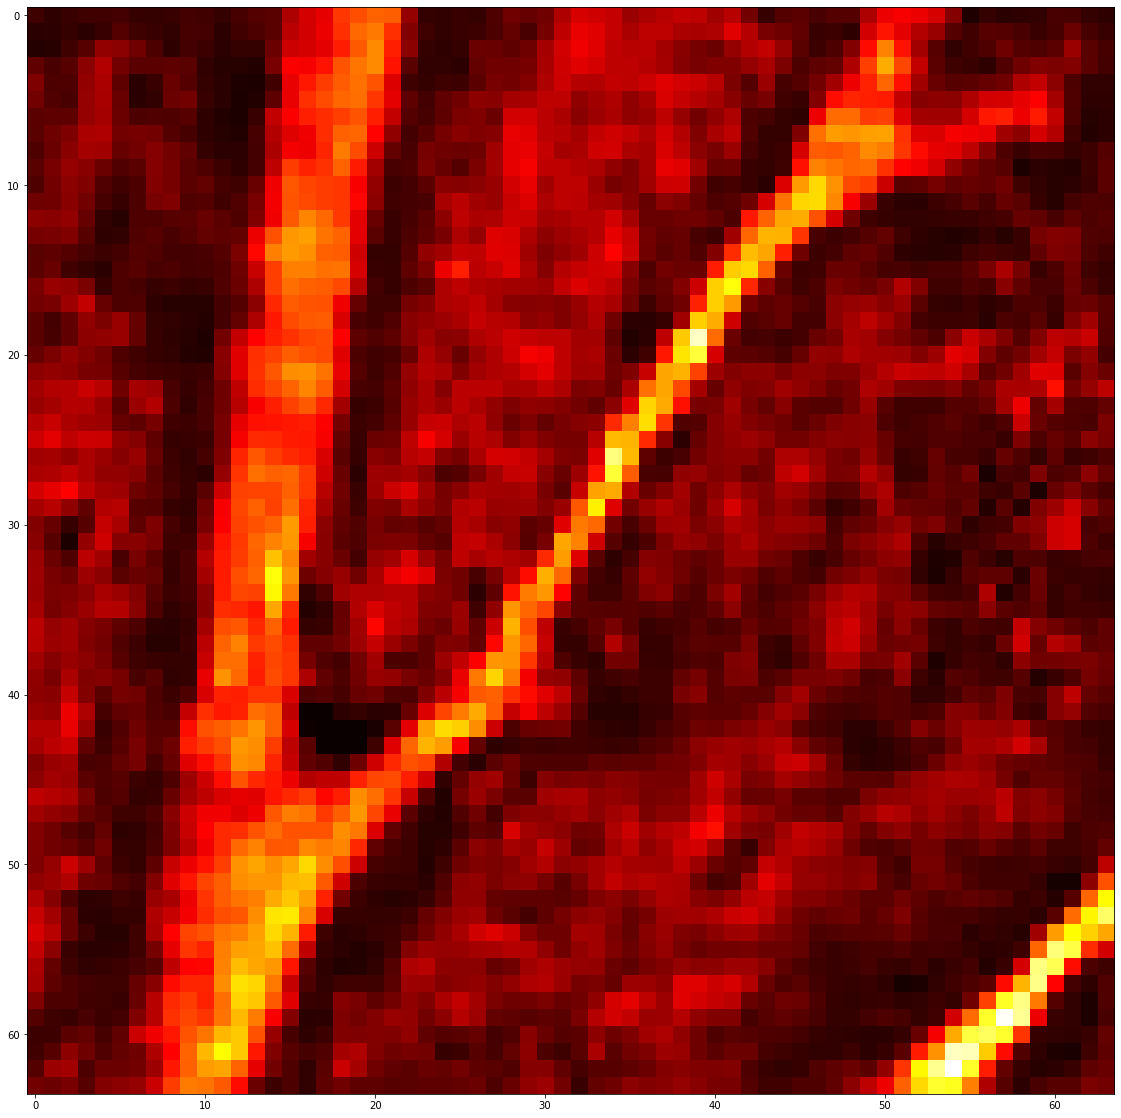

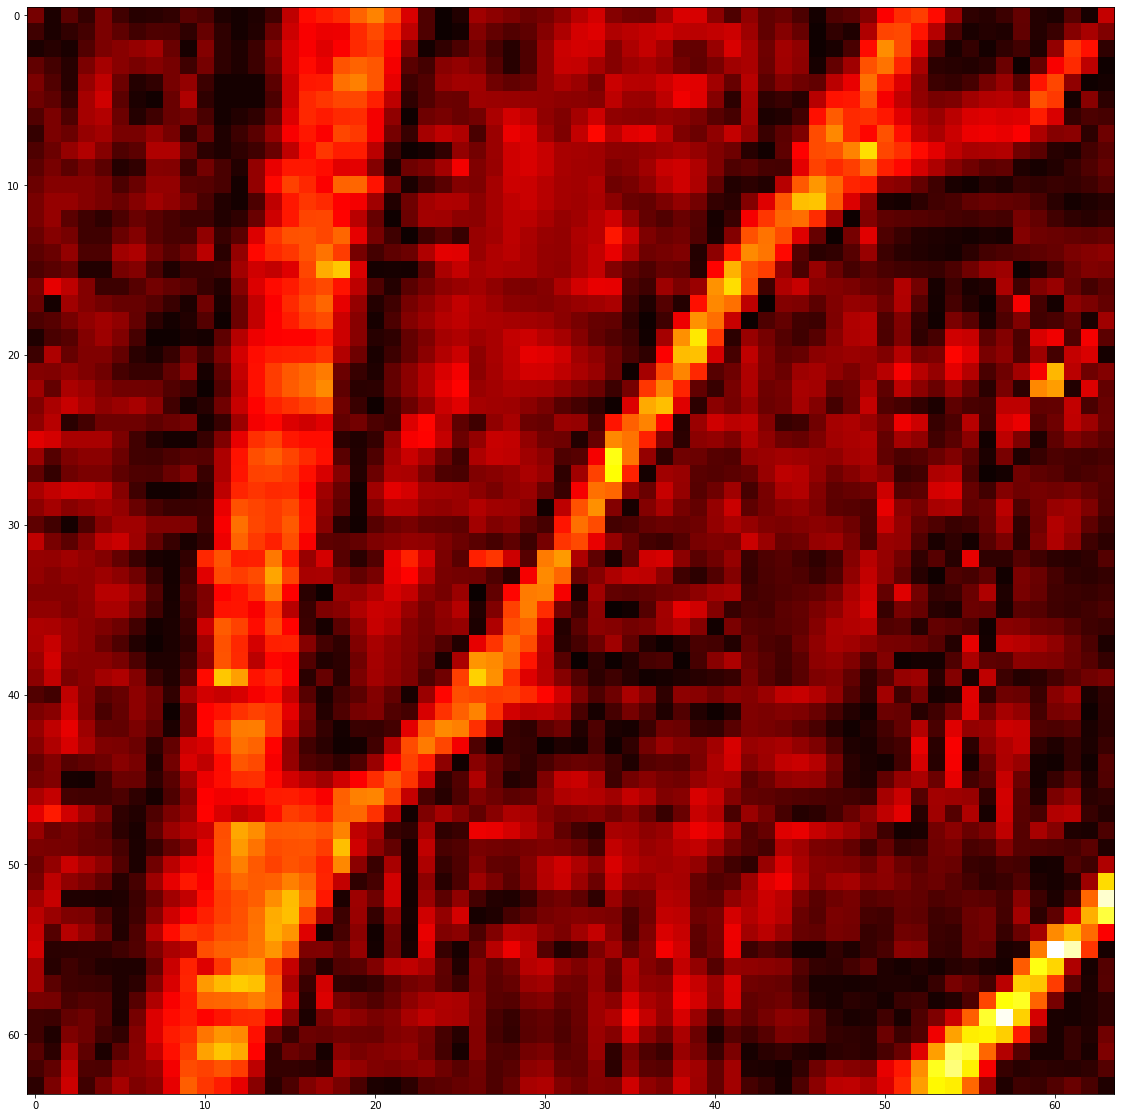

In [36]:
plt.figure(figsize=(20,20))
plt.imshow(low_patch,'hot')
plt.figure(figsize=(20,20))
plt.imshow(rst_patch,'hot')
plt.figure(figsize=(20,20))
plt.imshow(high_patch,'hot')

In [21]:
i = 316
low_patch = np.load('./data_polar_div/angle/low/%04d.npy'%i)
rst_patch = np.load('./data_polar_div/angle/result/%04d.npy'%i)
high_patch = np.load('./data_polar_div/angle/high/%04d.npy'%i)
print(np.max(low_patch))
print(np.max(rst_patch))
print(np.max(high_patch))

254.9682499001493
261.09747
254.99765418469562


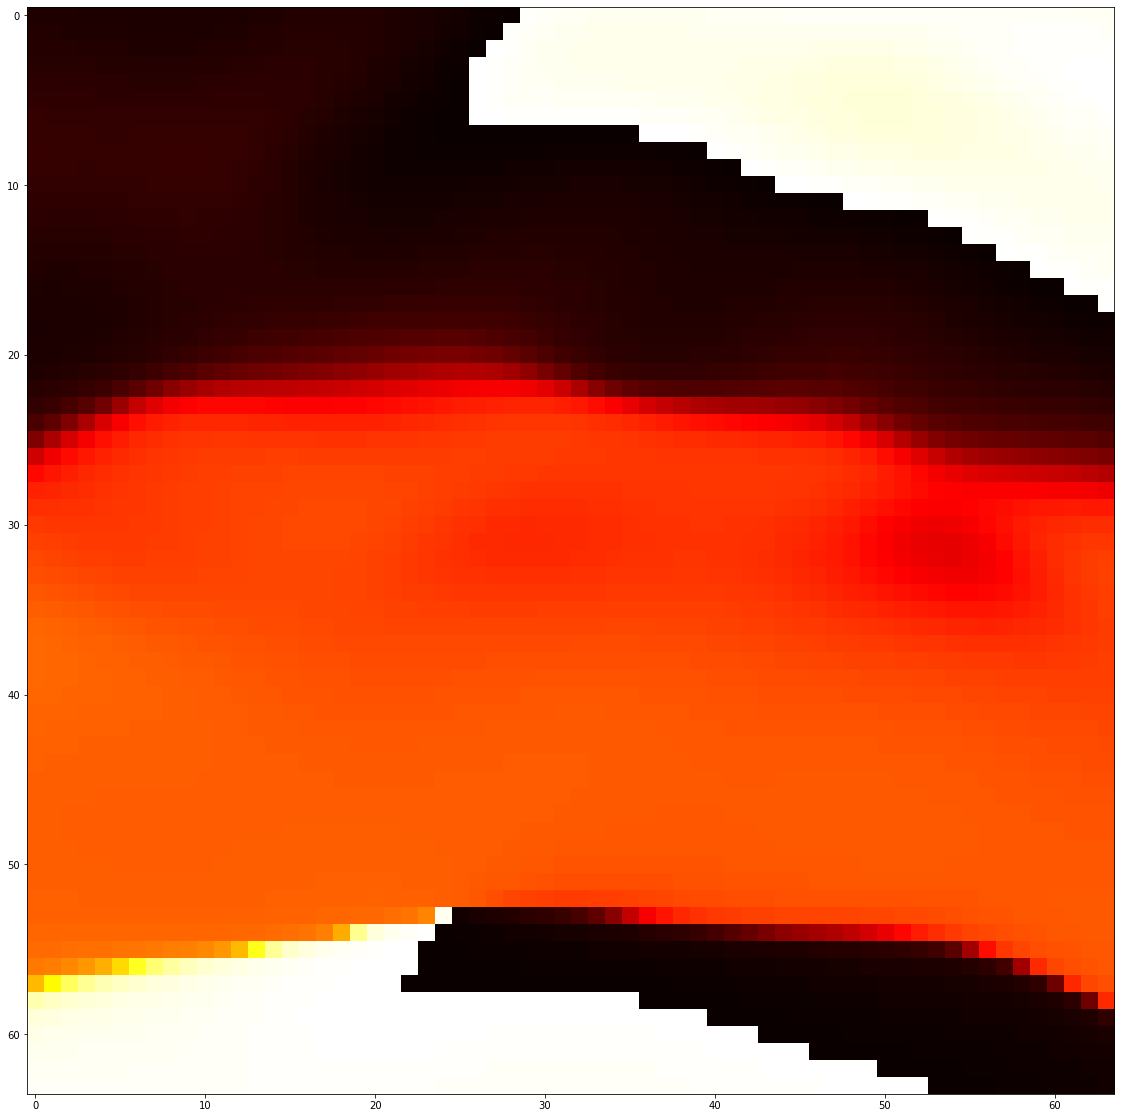

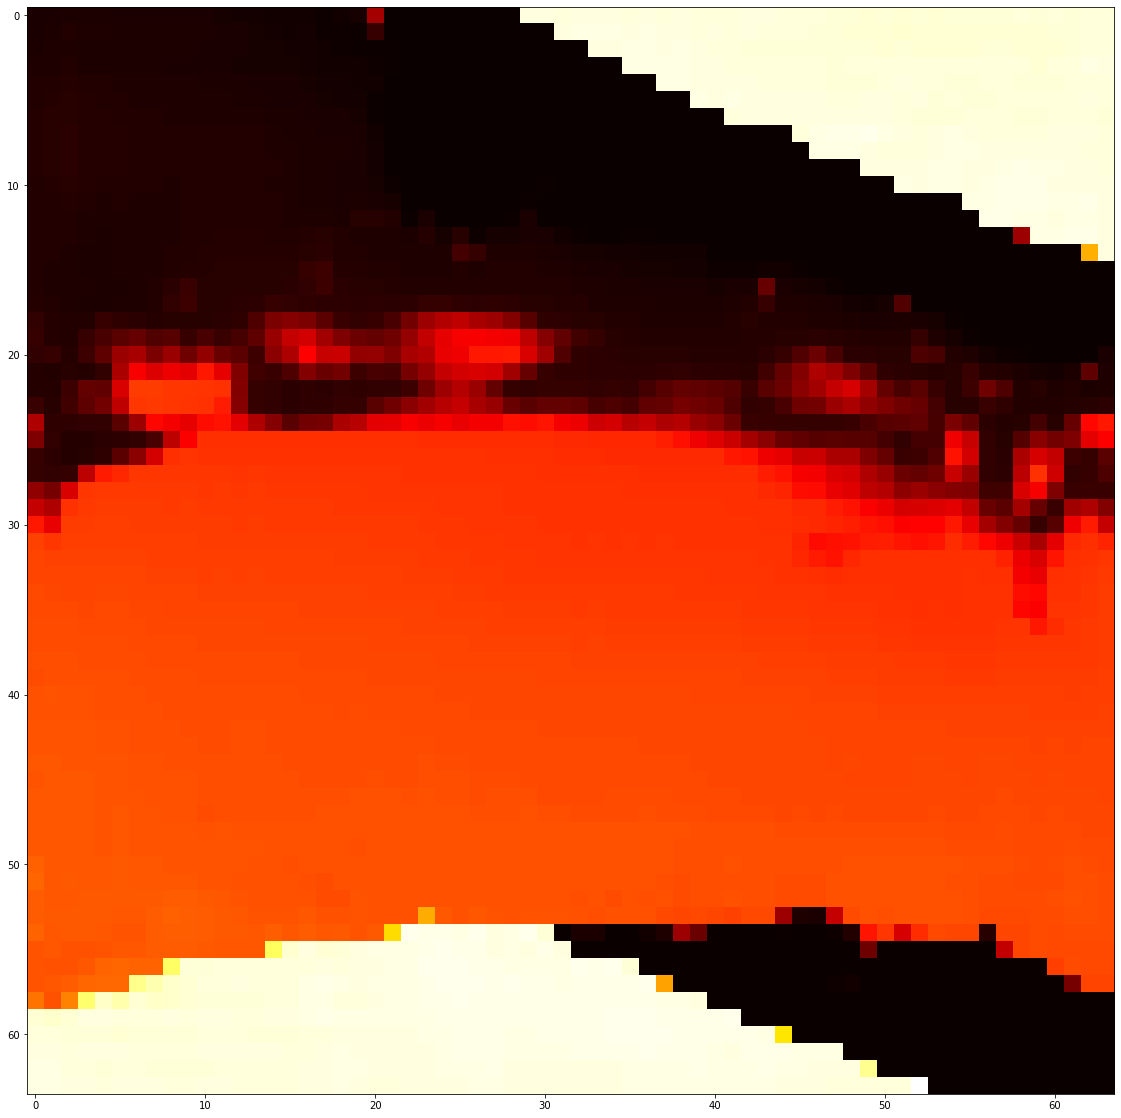

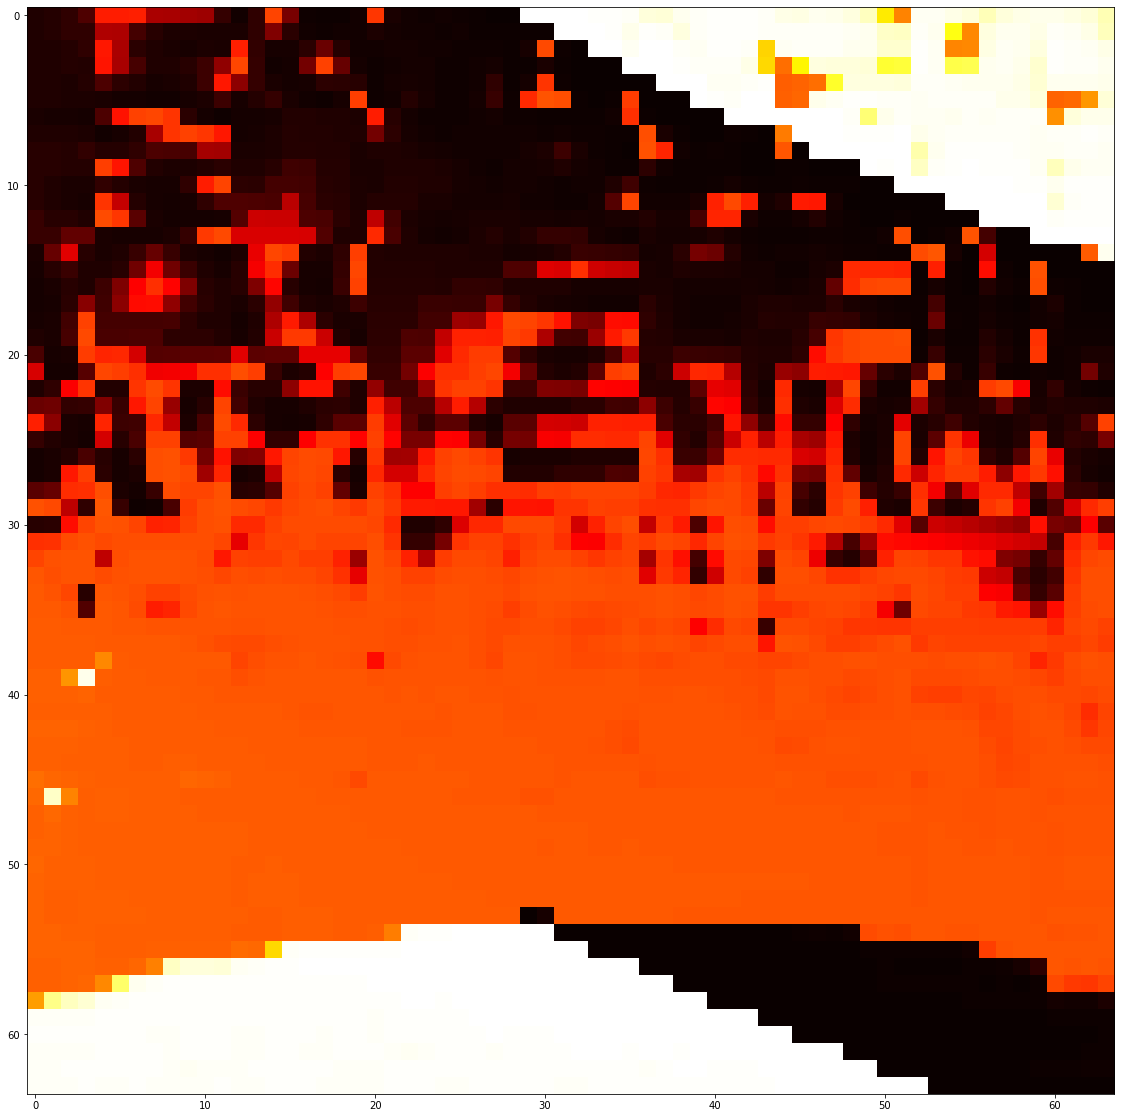

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(low_patch,'hot')
plt.figure(figsize=(20,20))
plt.imshow(rst_patch,'hot')
plt.figure(figsize=(20,20))
plt.imshow(high_patch,'hot')

In [26]:
def smooth(arr, k):
    length = len(arr)
    new_arr = [0.0]*length
    for i in range(length):
        if i-k<0:
            new_arr[i] = np.mean(arr[:i+k])
        if i+k>=length:
            new_arr[i] = np.mean(arr[i-k:])
        else:
            new_arr[i] = np.mean(arr[i-k:i+k])
    return new_arr

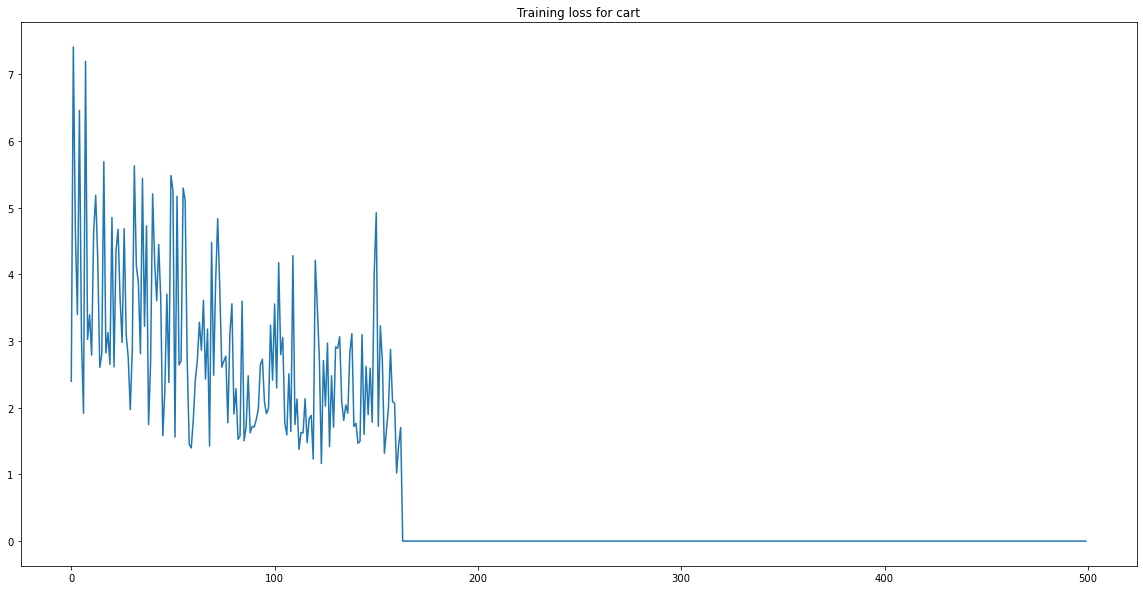

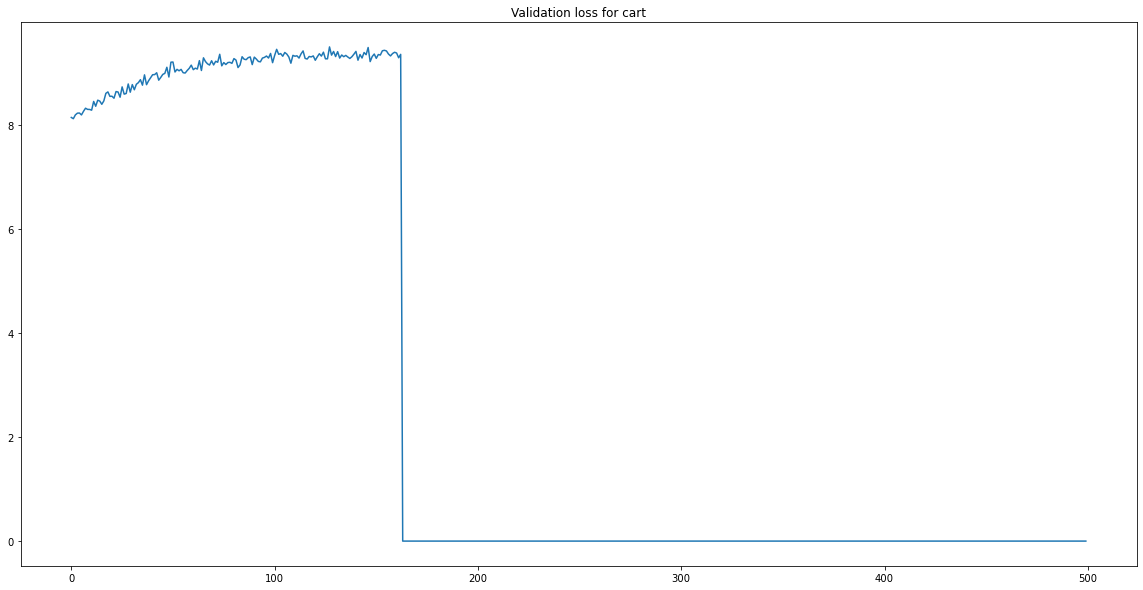

In [28]:
loss_cart_p = np.load('./loss/p_loss_img1.npy')
loss_cart_v = np.load('./loss/v_loss_img1.npy')
plt.figure(figsize=(20,10))
plt.title("Training loss for cart")
plt.plot(loss_cart_p)
plt.figure(figsize=(20,10))
plt.title("Validation loss for cart")
plt.plot(loss_cart_v)

188.5730638357088


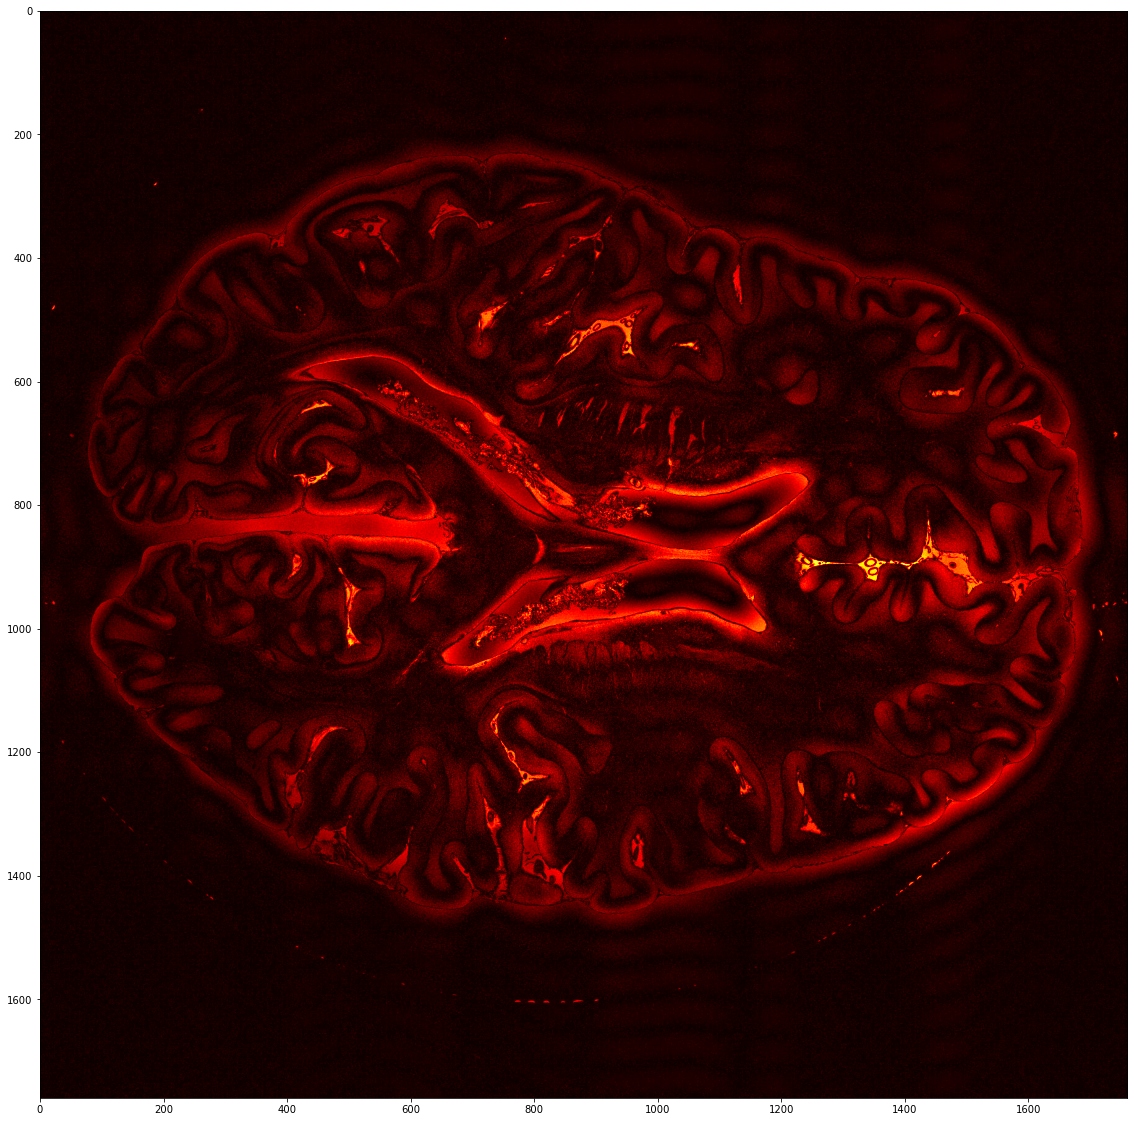

In [20]:
high_edge = np.load('./image_multiple/abs/high/0685.npy')
plt.figure(figsize=(20,20))
plt.imshow(high_edge, 'hot')
print(np.max(high_edge))

In [46]:
i = 342
low_patch = np.load('./data_img/low/%04d.npy'%i)
rst_patch = np.load('./data_img/result/%04d.npy'%i)
high_patch = np.load('./data_img/high/%04d.npy'%i)
print(np.max(low_patch))
print(np.max(rst_patch))
print(np.max(high_patch))

44.50272473026685
48.399002
50.0


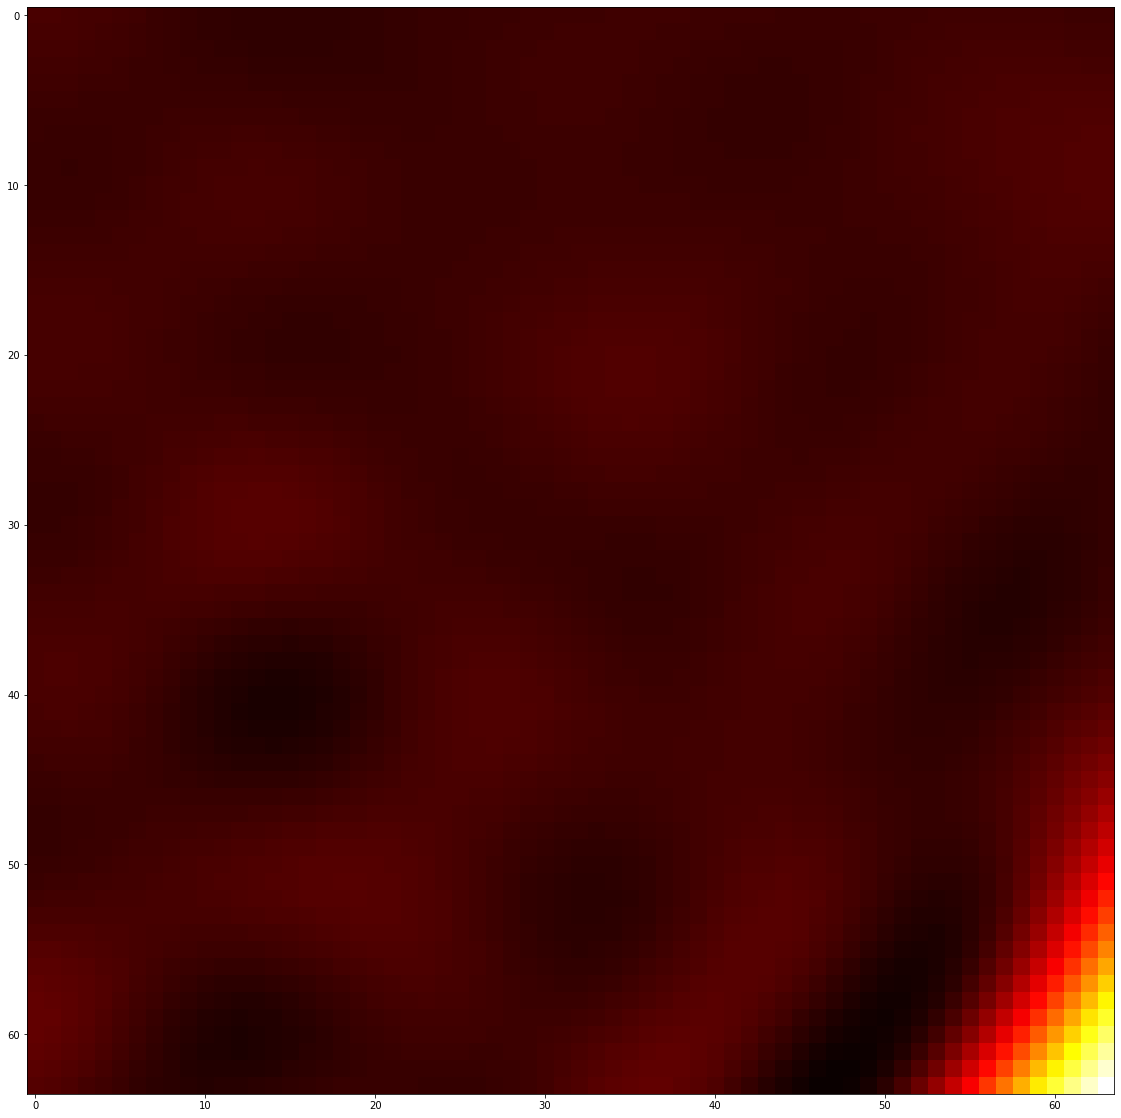

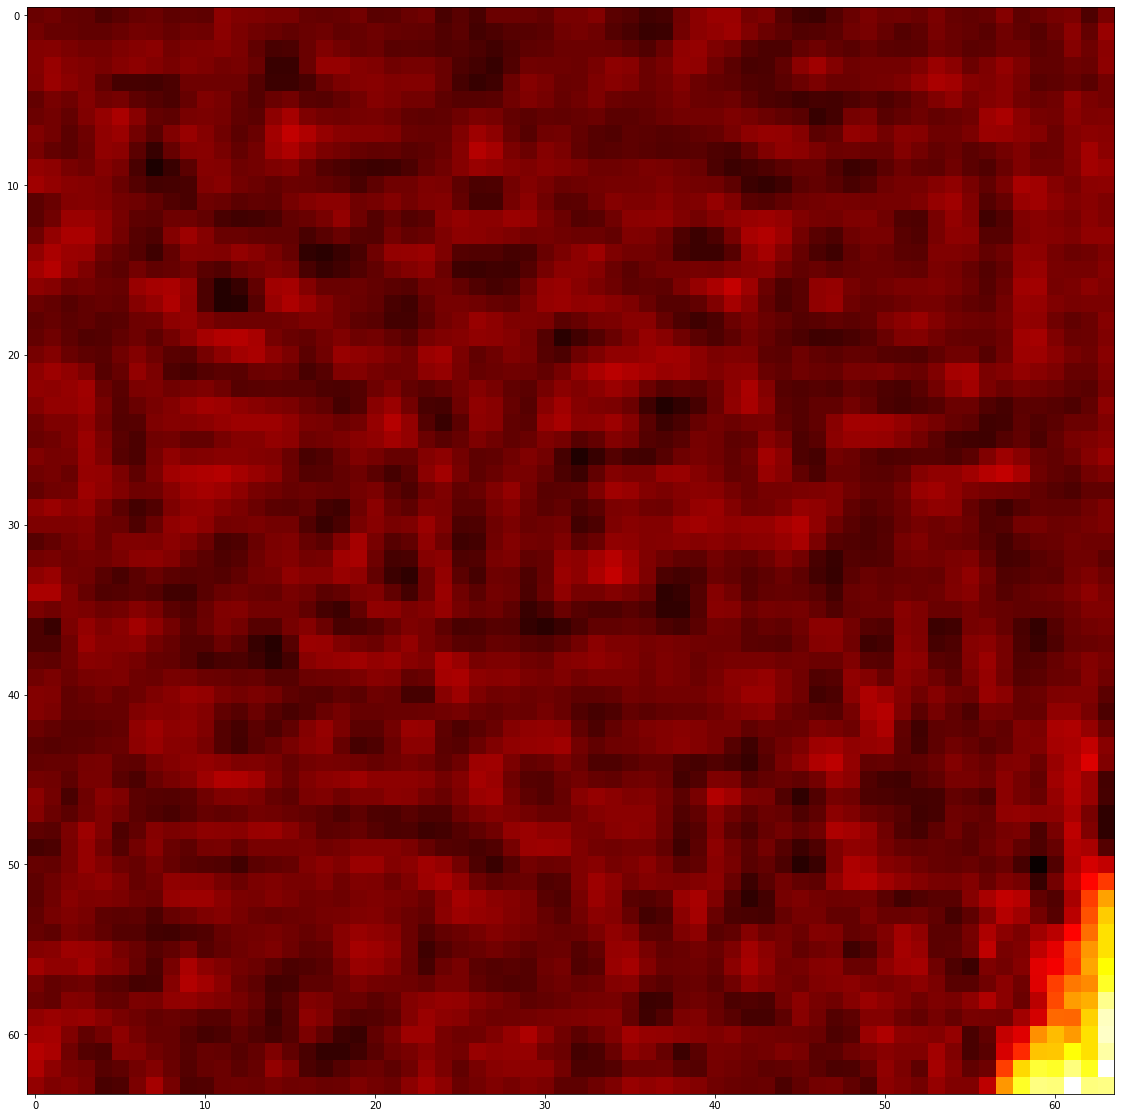

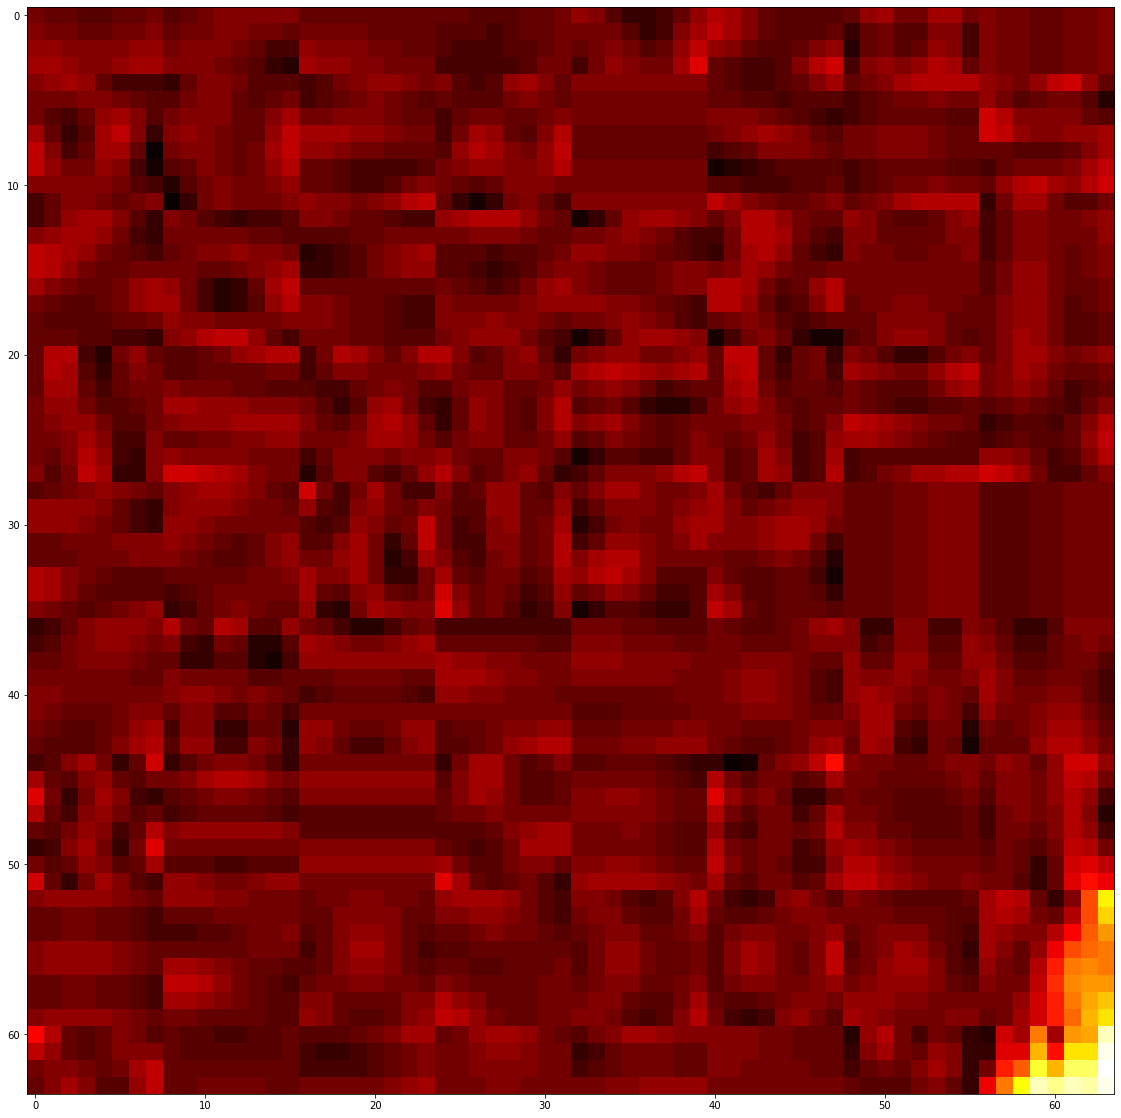

In [47]:
plt.figure(figsize=(20,20))
plt.imshow(low_patch,'hot')
plt.figure(figsize=(20,20))
plt.imshow(rst_patch,'hot')
plt.figure(figsize=(20,20))
plt.imshow(high_patch,'hot')

In [12]:
import scipy.io as scio
 
dataFile = 'edge.mat'
data = scio.loadmat(dataFile)

FileNotFoundError: [Errno 2] No such file or directory: 'edge.mat'

In [ ]:
for i in range(0,110):
    for j in range(0,110):
        
        